# Exrcise 3

<img src="./images/03.png" width=700>

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
import timeit


time_cpu = []
for i in range(12):
  x = torch.rand(2 ** i, 2** i)
  time_cpu.append(timeit.timeit('x @ x', globals=globals(), number=100))

In [ ]:
time_cpu

[0.00165163299999449,
 0.003704134000003023,
 0.0005452370000114115,
 0.0010321540000006735,
 0.0003630020000002787,
 0.0011512540000069293,
 0.0010635160000163069,
 0.012624966000004179,
 0.04462854299998753,
 0.35189479799998935,
 2.64998232100001,
 23.287149865000004]

In [ ]:
device = torch.device('cuda')
time_gpu = []
for i in range(12):
  x = torch.rand(2 ** i, 2** i)
  x = x.to(device)
  time_gpu.append(timeit.timeit('x @ x', globals=globals(), number=100))

In [ ]:
time_gpu

[0.11766567799998029,
 0.02507661399999961,
 0.001197466999997232,
 0.001173566000034043,
 0.0011639699999932418,
 0.01120816200000263,
 0.0013527980000844764,
 0.004529629999979079,
 0.02665076199991745,
 0.0015469190000203525,
 0.0015845699999772478,
 0.0018686130000560297]

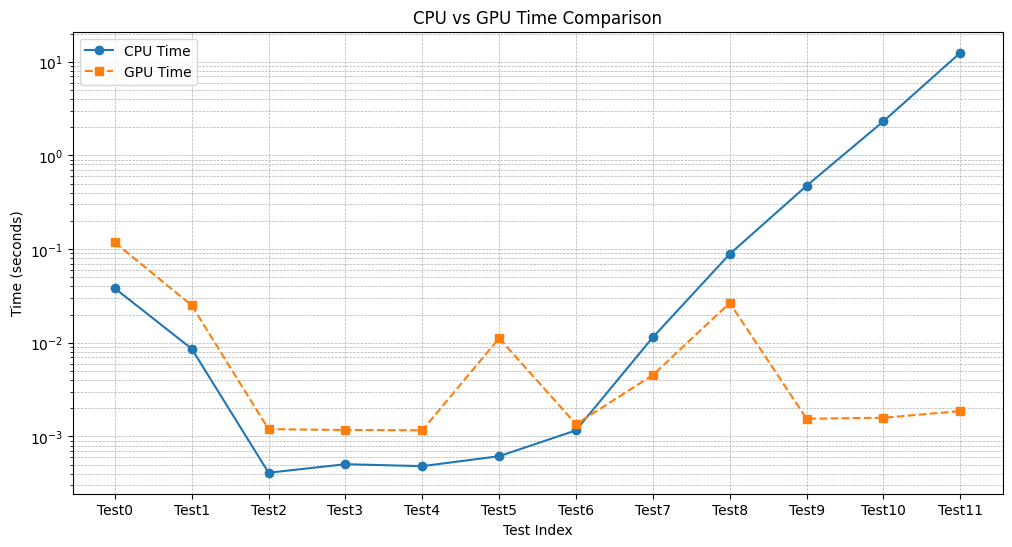

In [ ]:
import matplotlib.pyplot as plt

# Generate indices for x-axis (1 to 12)
indices = list(range(0, len(time_cpu)))

# Set up the figure size
plt.figure(figsize=(12, 6))

# Plot CPU times
plt.plot(indices, time_cpu, marker='o', linestyle='-', label='CPU Time')

# Plot GPU times
plt.plot(indices, time_gpu, marker='s', linestyle='--', label='GPU Time')

# Set x and y labels
plt.xlabel('Test Index')
plt.ylabel('Time (seconds)')

# Set the title
plt.title('CPU vs GPU Time Comparison')

# Add a legend
plt.legend()

# Enable grid lines
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Use logarithmic scale for the y-axis
plt.yscale('log')

# Set x-ticks to be integer indices
labels = ['Test0', 'Test1', 'Test2',
          'Test3', 'Test4', 'Test5',
          'Test6', 'Test7', 'Test8',
          'Test9', 'Test10', 'Test11']
plt.xticks(indices, labels)

# Show the plot
plt.show()